# BUSINESS UNDERSTANDING

# DATA UNDERSTANDING

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# File paths
bank_path = r'C:\Users\Dell\Term-Deposit-Prediction-ML\Data\Raw\bank.csv'
bank_additional_path = r'C:\Users\Dell\Term-Deposit-Prediction-ML\Data\Raw\bank-additional.csv'
bank_additional_full_path = r'C:\Users\Dell\Term-Deposit-Prediction-ML\Data\Raw\bank-additional-full.csv'
bank_full_path = r'C:\Users\Dell\Term-Deposit-Prediction-ML\Data\Raw\bank-full.csv'


# Load datasets
datasets = {
    "bank.csv": pd.read_csv(bank_path, sep=';'),
    "bank-additional.csv": pd.read_csv(bank_additional_path, sep=';'),
    "bank-additional-full.csv": pd.read_csv(bank_additional_full_path, sep=';'),
    "bank-full.csv": pd.read_csv(bank_full_path, sep=';')
}

# Summarize datasets in a tabular format
summary_table = []

for name, df in datasets.items():
    summary_table.append({
        "Dataset": name,
        "Rows": df.shape[0],
        "Columns": df.shape[1],
        "Missing Values": df.isnull().sum().sum(),
        "Categorical Columns": len(df.select_dtypes(include=['object']).columns),
        "Numerical Columns": len(df.select_dtypes(include=['int64', 'float64']).columns),
        "Target Distribution (no)": round(df['y'].value_counts(normalize=True).get('no', 0) * 100, 2) if 'y' in df.columns else None,
        "Target Distribution (yes)": round(df['y'].value_counts(normalize=True).get('yes', 0) * 100, 2) if 'y' in df.columns else None
    })

# Convert the summary into a DataFrame for better visualization
summary_df = pd.DataFrame(summary_table)

# Print the summary table
summary_df

,Dataset,Rows,Columns,Missing Values,Categorical Columns,Numerical Columns,Target Distribution (no),Target Distribution (yes)
0,bank.csv,4521,17,0,10,7,88.48,11.52
1,bank-additional.csv,4119,21,0,11,10,89.05,10.95
2,bank-additional-full.csv,41188,21,0,11,10,88.73,11.27
3,bank-full.csv,45211,17,0,10,7,88.30,11.70


Based on the summary above, I will use bank-additional-full.csv dataset for EDA because:

It has the largest number of rows (41,188) for robust analysis.
It includes additional economic features (emp.var.rate, cons.price.idx, etc.) that are not present in bank.csv or bank-full.csv.
I will use this dataset to identify patterns, generate insights, and answer key business questions.



## Defining the  Business Questions and Hypotheses
Before diving into EDA, let’s define 4 business questions and hypotheses aligned with the marketing campaign context:

Business Questions:

1. What demographic factors (e.g., age, marital status, education) influence subscription to term deposits?
2. How does the duration of a phone call affect the likelihood of a subscription?
3. Do previous interactions with the bank (e.g., previous, pdays) impact subscription rates?
4. Are economic indicators (e.g., emp.var.rate, euribor3m) correlated with subscription likelihood?

Hypothesis:

Longer phone call durations increase the likelihood of a subscription.



## Exploratory Data Analysis
We will systematically analyze the data to:

i. Answer the business questions.

ii. Test the hypothesis.

iii. Generate actionable insights

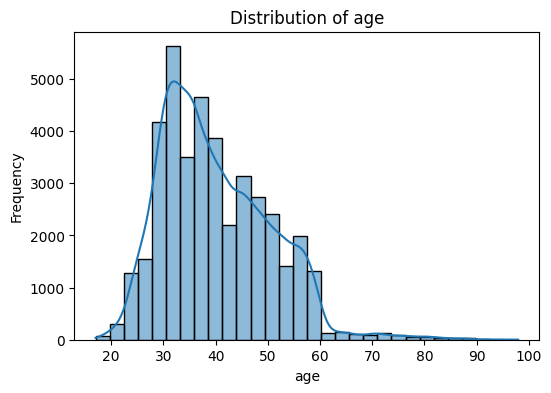

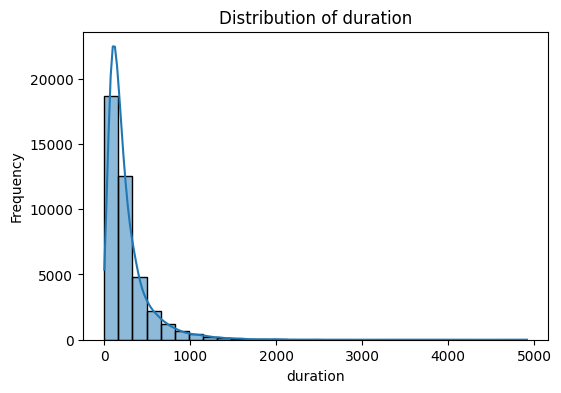

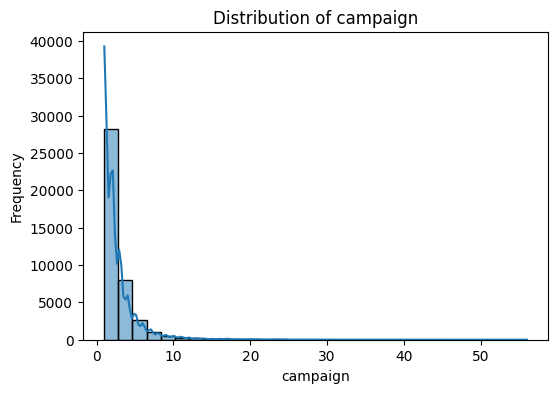

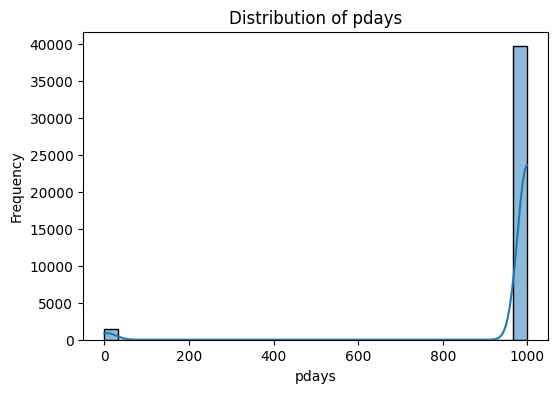

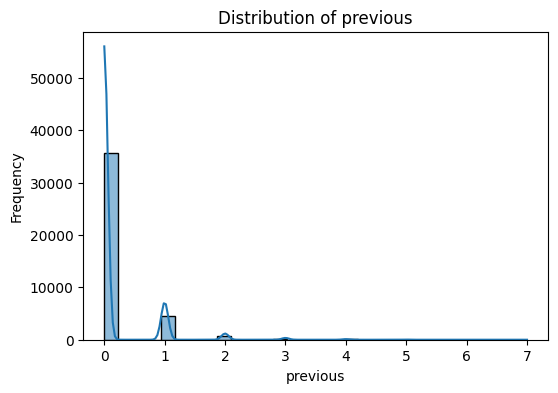

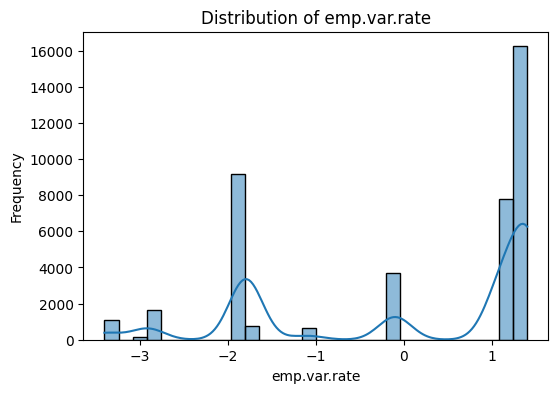

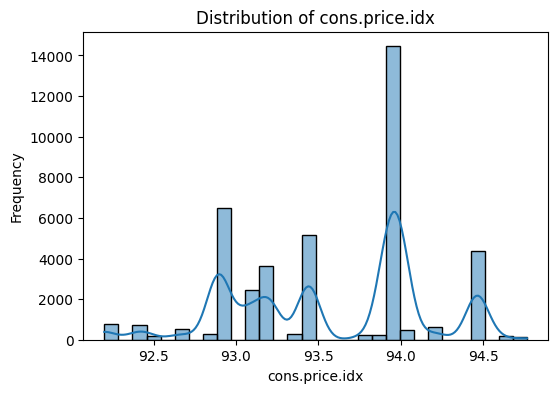

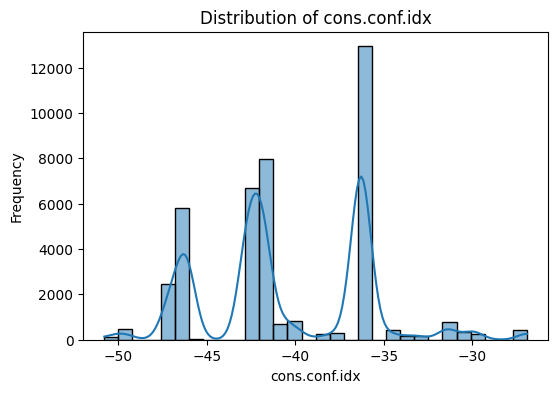

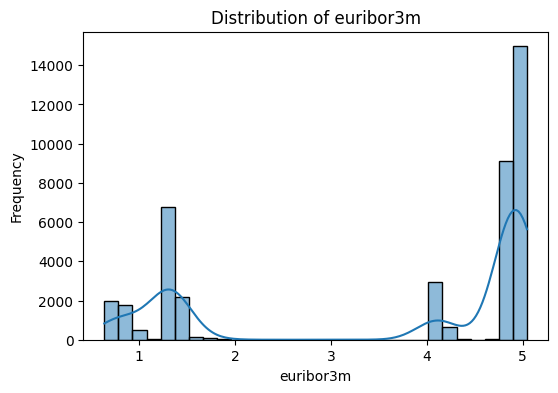

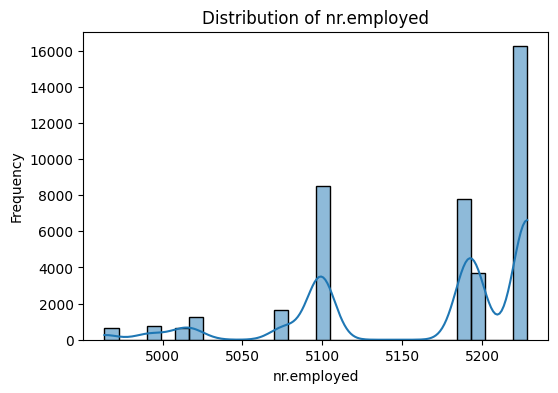

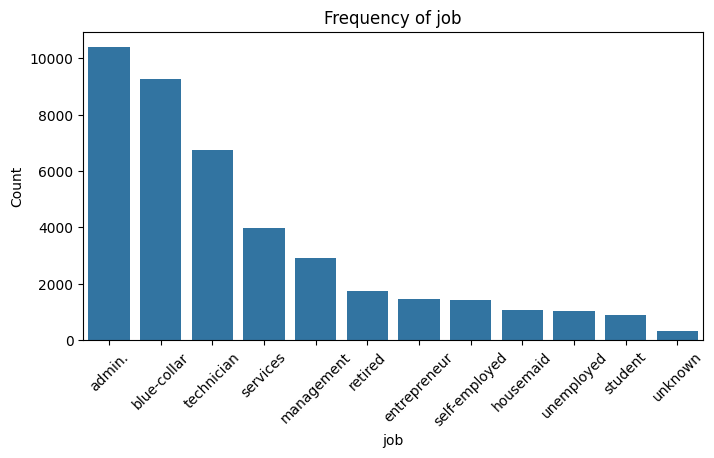

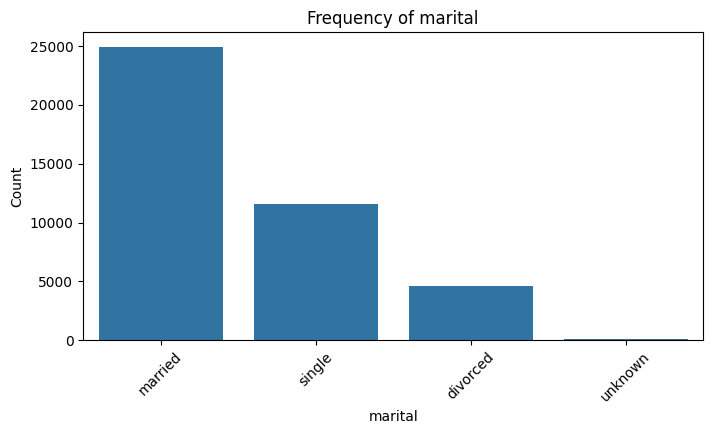

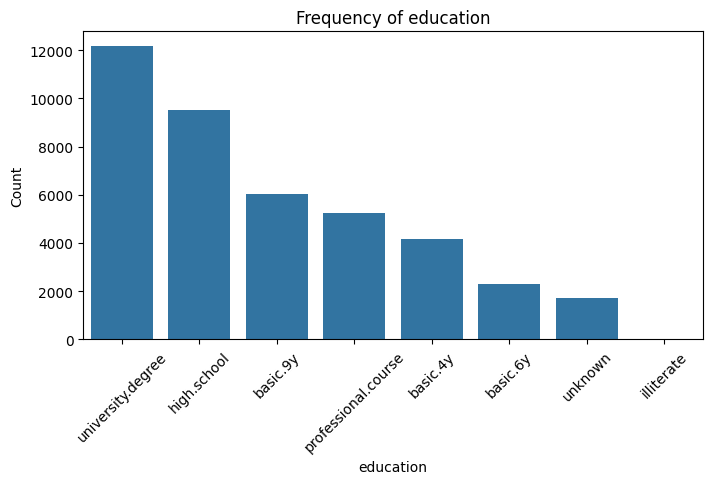

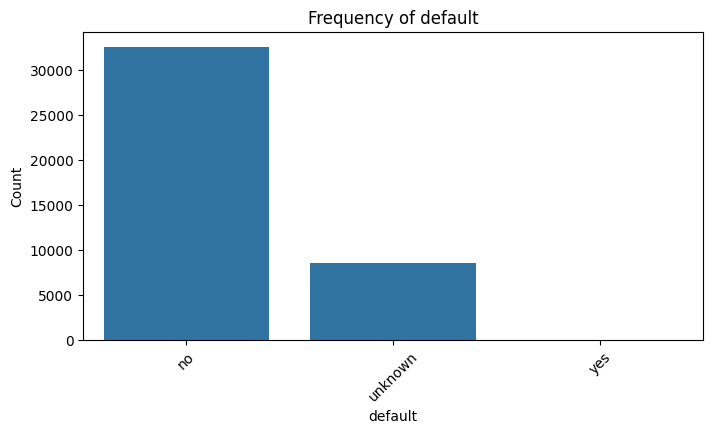

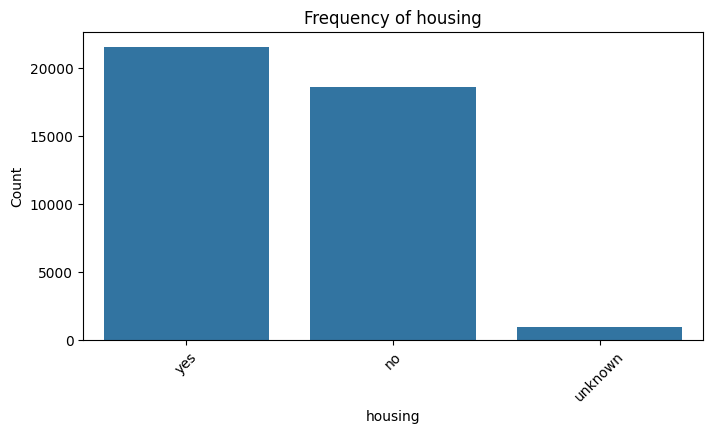

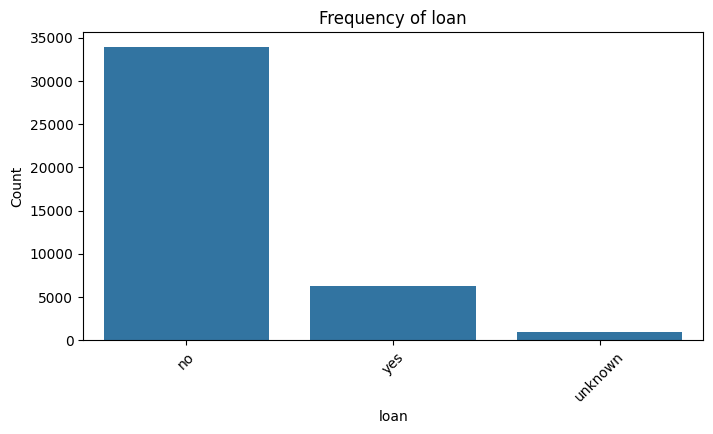

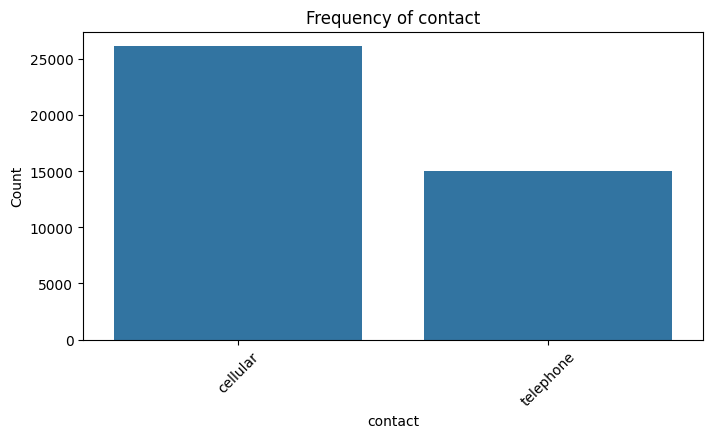

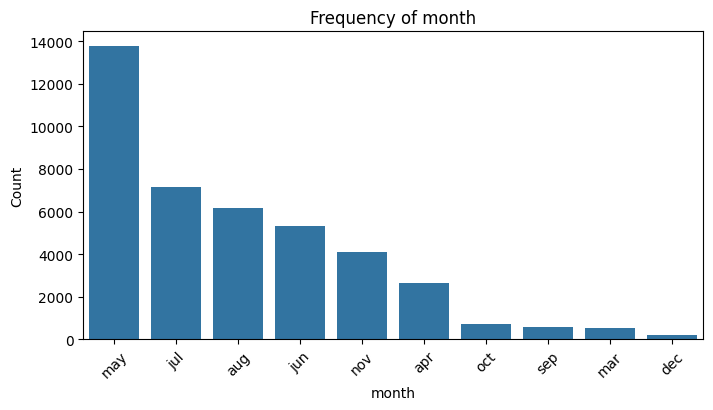

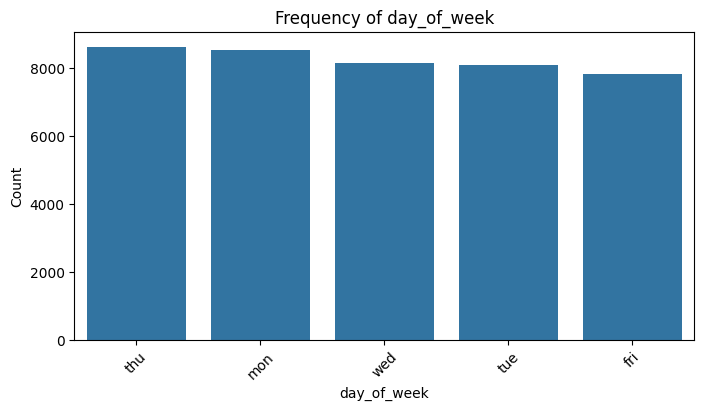

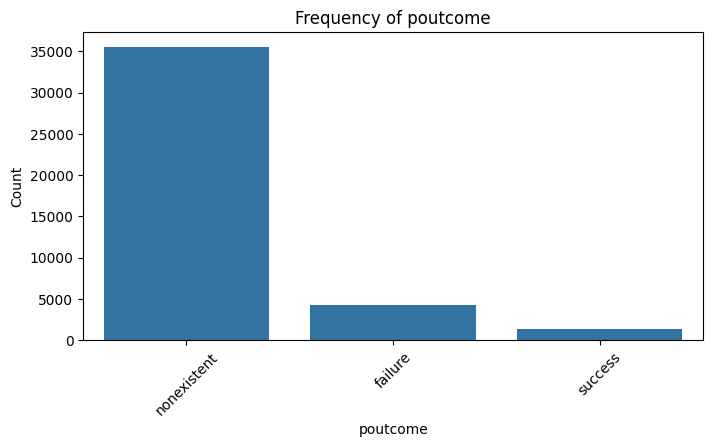

In [19]:
# Step 1: Load the dataset
data_path = r'C:\Users\Dell\Term-Deposit-Prediction-ML\Data\Raw\bank-additional-full.csv'
data = pd.read_csv(data_path, sep=';')  # Ensure the file is read into a DataFrame

# Step 2: Define key features for analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
# Step 3: Univariate Analysis - Numerical Features
# Plot histograms for numerical features
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Step 4: Univariate Analysis - Categorical Features
# Bar plots for categorical features
for col in categorical_columns:
    if col != 'y':  # Exclude the target variable
        plt.figure(figsize=(8, 4))
        sns.countplot(x=data[col], order=data[col].value_counts().index)
        plt.title(f"Frequency of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()


In [22]:

# Summarize numerical features
numerical_summary = []
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    desc = data[col].describe()
    skewness = data[col].skew()
    numerical_summary.append({
        "Feature": col,
        "Mean": round(desc["mean"], 2),
        "Median": round(desc["50%"], 2),
        "Std Dev": round(desc["std"], 2),
        "Min": round(desc["min"], 2),
        "25%": round(desc["25%"], 2),
        "75%": round(desc["75%"], 2),
        "Max": round(desc["max"], 2),
        "Skewness": round(skewness, 2)
    })

#  Summarize categorical features
categorical_summary = []
for col in data.select_dtypes(include=['object']).columns:
    value_counts = data[col].value_counts()
    categorical_summary.append({
        "Feature": col,
        "Top Category": value_counts.idxmax(),
        "Top Count": value_counts.max(),
        "Unique Categories": len(value_counts)
    })

# Convert summaries to DataFrames
numerical_df = pd.DataFrame(numerical_summary)
categorical_df = pd.DataFrame(categorical_summary)

# Display the tables
print("\nNumerical Feature Summary:")
numerical_df




Numerical Feature Summary:


,Feature,Mean,Median,Std Dev,Min,25%,75%,Max,Skewness
0,age,40.02,38.00,10.42,17.00,32.00,47.00,98.00,0.78
1,duration,258.29,180.00,259.28,0.00,102.00,319.00,4918.00,3.26
2,campaign,2.57,2.00,2.77,1.00,1.00,3.00,56.00,4.76
3,pdays,962.48,999.00,186.91,0.00,999.00,999.00,999.00,-4.92
4,previous,0.17,0.00,0.49,0.00,0.00,0.00,7.00,3.83
5,emp.var.rate,0.08,1.10,1.57,-3.40,-1.80,1.40,1.40,-0.72
6,cons.price.idx,93.58,93.75,0.58,92.20,93.08,93.99,94.77,-0.23
7,cons.conf.idx,-40.50,-41.80,4.63,-50.80,-42.70,-36.40,-26.90,0.30
8,euribor3m,3.62,4.86,1.73,0.63,1.34,4.96,5.04,-0.71
9,nr.employed,5167.04,5191.00,72.25,4963.60,5099.10,5228.10,5228.10,-1.04


In [23]:
print("\nCategorical Feature Summary:")
categorical_df



Categorical Feature Summary:


,Feature,Top Category,Top Count,Unique Categories
0,job,admin.,10422,12
1,marital,married,24928,4
2,education,university.degree,12168,8
3,default,no,32588,3
4,housing,yes,21576,3
5,loan,no,33950,3
6,contact,cellular,26144,2
7,month,may,13769,10
8,day_of_week,thu,8623,5
9,poutcome,nonexistent,35563,3


### Key Takeaways:
Numerical Features:

1. duration is critical, as longer calls are likely more successful.

2. Features like pdays and previous indicate a lack of prior engagements for most clients.

3. Economic indicators (emp.var.rate, euribor3m) cluster around specific values, reflecting varying macroeconomic conditions.

Categorical Features:

1. Clients are mostly administrative workers, married, and university-educated.

2. May is the busiest month, and Thursdays are the most active day for calls.

3. poutcome shows the majority of clients were new to campaigns.

In [ ]:
# Bivariate Analysis

# Numerical Features vs Target with Enhanced Visualizations
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, len(numerical_columns) * 4))  # Dynamically adjust figure size
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)  # One plot per row for better readability
    ax = sns.boxplot(x='y', y=col, data=data, hue='y', dodge=False, palette="coolwarm", showmeans=True)
    plt.title(f"{col} vs Target (y)")
    plt.xlabel("Subscription (y)")
    plt.ylabel(col)
    
    # Add annotations to show median values
    medians = data.groupby('y')[col].median()  # Calculate median values for each target group
    for j, median in enumerate(medians):
        ax.text(j, median, f'{median:.2f}', color='black', ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()





Key Takeaways for Numerical Features

i. duration: This is the strongest predictor of subscription. Longer calls often lead to a "yes," indicating client engagement is key.

ii. pdays and previous: Clients with prior successful interactions are more likely to subscribe, reinforcing the importance of maintaining client relationships.

iii. Economic Indicators (emp.var.rate, euribor3m): Reflecting macroeconomic conditions, favorable periods (low interest rates, positive employment changes) correlate with better campaign outcomes.

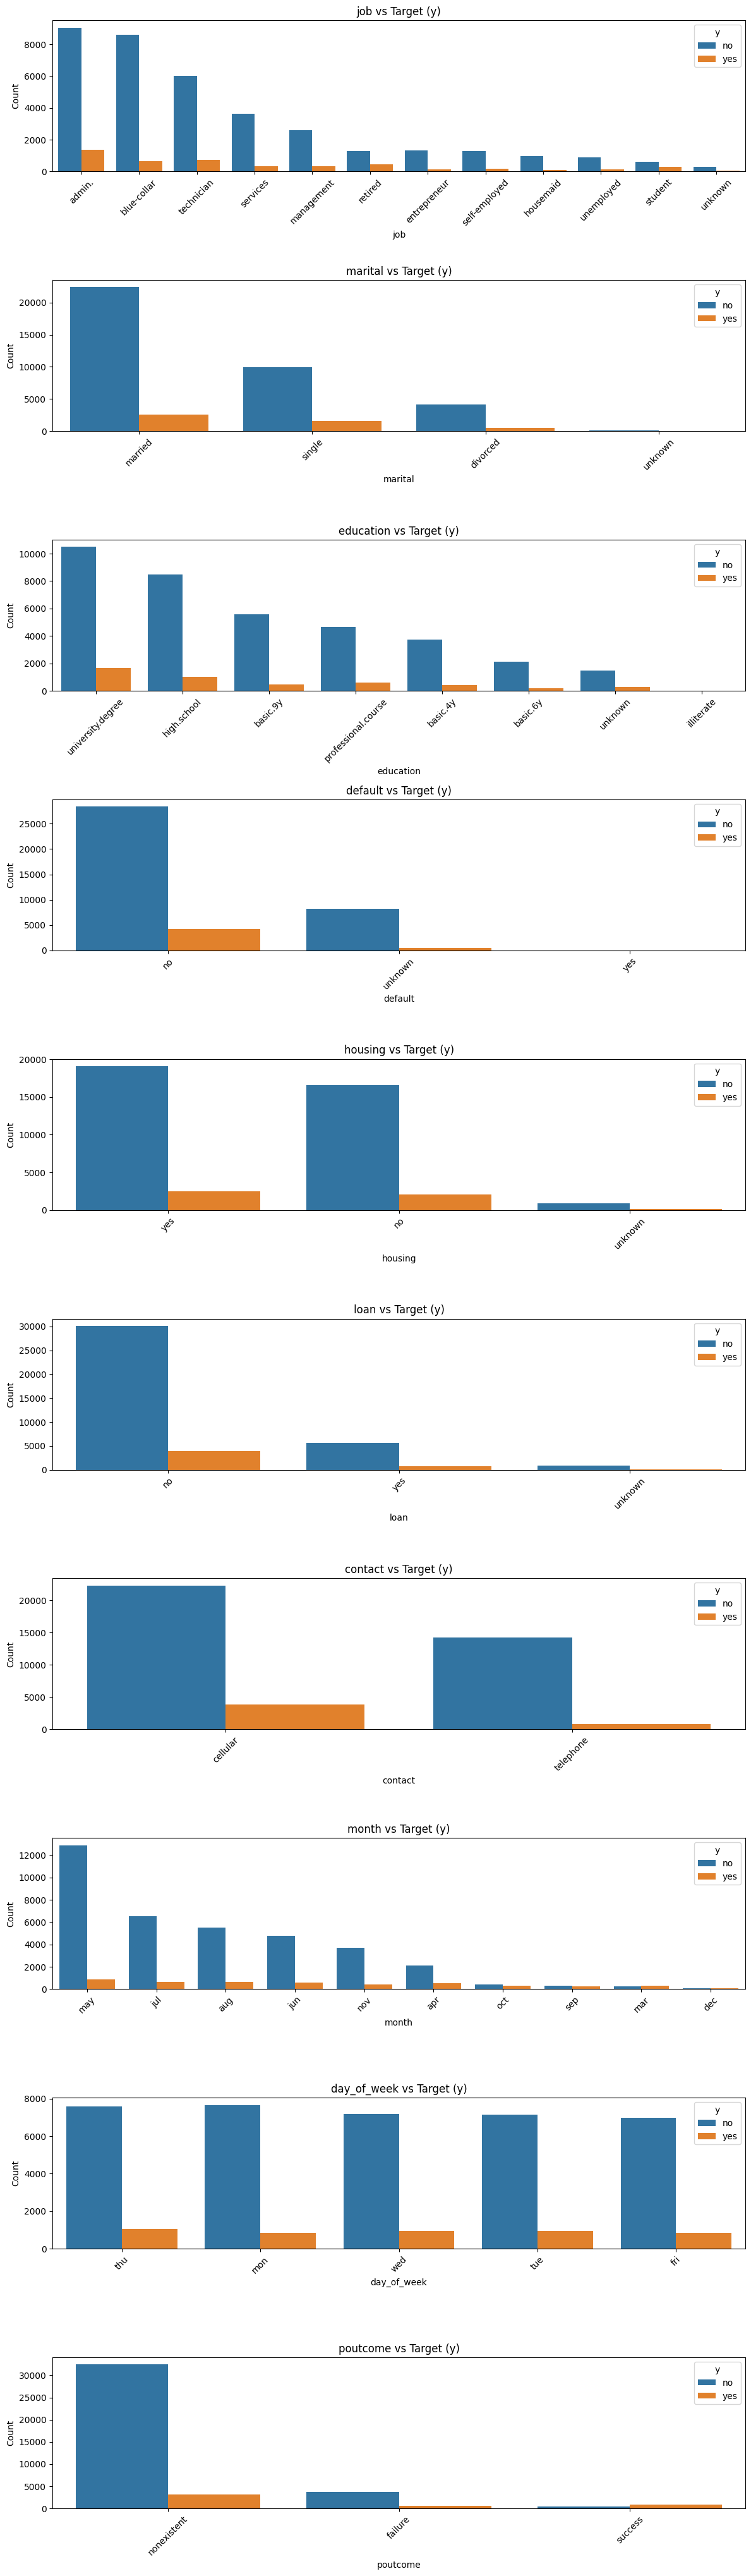

In [28]:
# Step 2: Categorical Features vs Target
categorical_columns = data.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, len(categorical_columns) * 4))  # Adjust figure size dynamically
for i, col in enumerate(categorical_columns, 1):
    if col != 'y':  # Exclude the target variable
        plt.subplot(len(categorical_columns), 1, i)  # One plot per row
        sns.countplot(x=col, hue='y', data=data, order=data[col].value_counts().index)
        plt.title(f"{col} vs Target (y)")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Key Takeaways for Categorical Features

i. Demographics (job, education, marital): Educated, single, or administrative professionals are more likely to subscribe, suggesting tailored messaging could improve outcomes.

ii. Loan Status (housing, loan): Clients with fewer financial commitments (no housing or personal loans) are more receptive to term deposit campaigns.

iii. Communication (contact): Mobile-based campaigns are far more effective, reinforcing the importance of leveraging modern communication methods.

iv. Campaign History (poutcome): Clients with successful previous interactions demonstrate a much higher conversion rate.

In [ ]:
# Multivariate Analysis

